In [2]:
!pip install --user zarr

     |████████████████████████████████| 185 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.7 MB 19.2 MB/s eta 0:00:01     |██▎                             | 471 kB 19.2 MB/s eta 0:00:01
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5035 sha256=7bfd7886872e6ddf06bd66eb4012703f65e19394e4a186e54cf589e839df2131
  Stored in directory: /home/sc.uni-leipzig.de/mi186veva/.cache/pip/wheels/a3/d7/75/19cd0d2a893cad4bb0b2b16dd572ad2916d19c0d5ee9612511
Successfully built asciitree
You should consider upgrading via the '/software/all/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
!pip install --user umap-learn

You should consider upgrading via the '/software/all/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import os
import zarr

In [7]:
#data = zarr.open('/work/users/li317raxi/VGG_11x11_noB_scaling_raw_10piles/VGG_11x11_noB_scaling_10piles/shuffled/all.zarr', mode='r')
data = np.load('/work/users/mi186veva/data_1d/raw_l2/batch_sized/batch287.npz')

In [8]:
print(data['X'].shape)
print(*data)

(10000, 92)
X y PatientName PatientIndex


In [9]:
X = data['X']
y = data['y']
names = data['PatientName']

In [10]:
data_tsne = TSNE(n_components=2).fit_transform(X)

In [11]:
data_tsne.shape
len(np.unique(names))

52

In [7]:
standard_embedding = umap.UMAP().fit_transform(X)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=names, s=0.1, cmap='Spectral')

AttributeError: module 'umap' has no attribute 'UMAP'

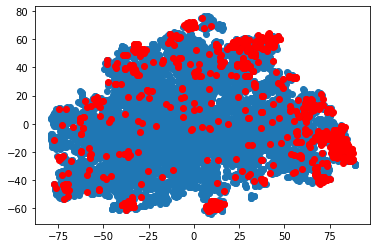

2019_07_12_11_15_49_


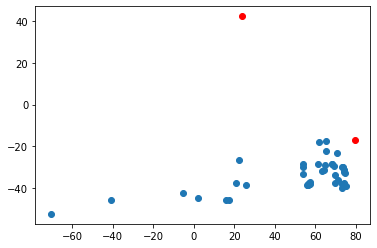

2019_07_15_11_33_28_


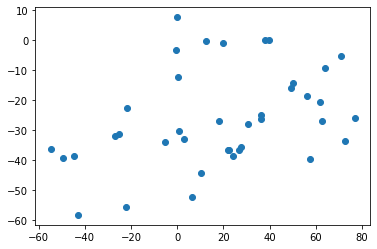

2019_07_17_15_38_14_


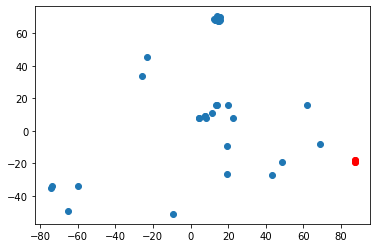

2019_07_25_11_56_38_


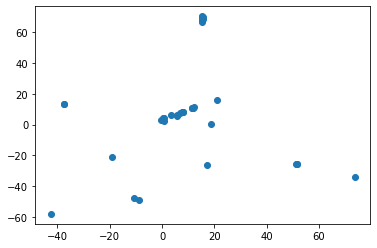

2019_08_09_12_17_55_


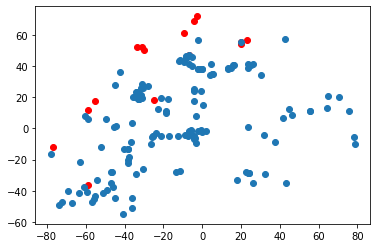

2019_08_12_10_52_33_


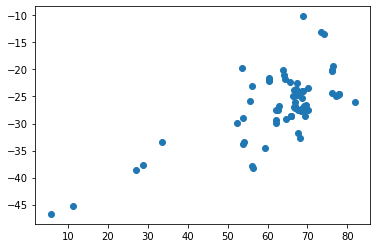

2019_08_23_12_15_26_


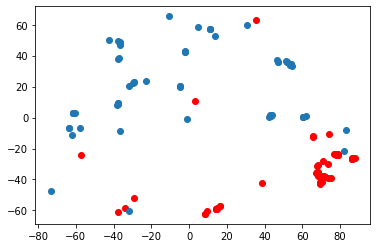

2019_08_28_14_00_34_


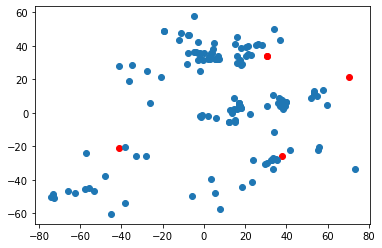

2019_09_04_12_43_40_


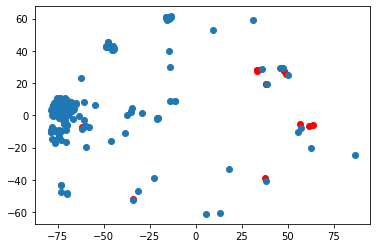

2019_09_09_17_01_38_


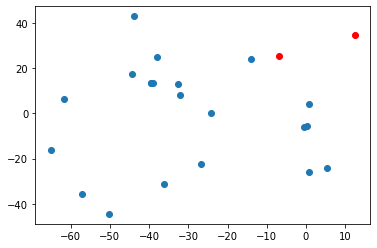

2019_09_25_13_07_12_


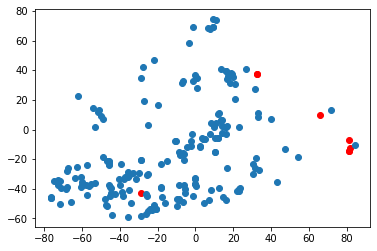

2019_09_25_19_44_52_


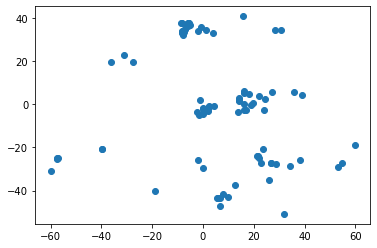

2019_09_30_20_50_43_


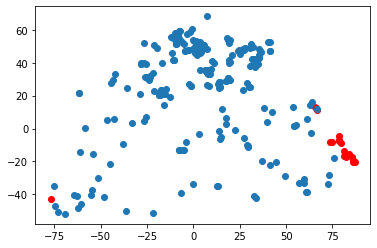

2019_10_24_15_53_04_


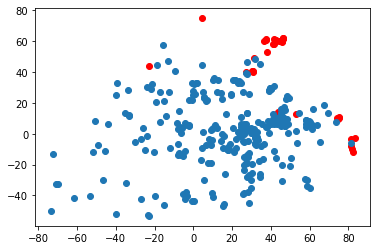

2019_10_25_11_19_55_


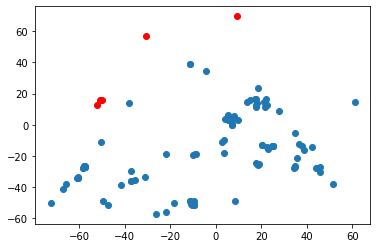

2019_10_25_16_55_01_


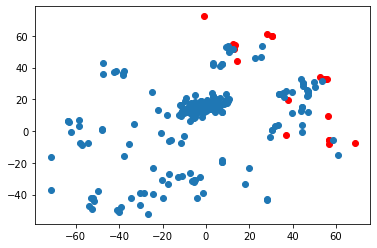

2019_10_30_14_30_27_


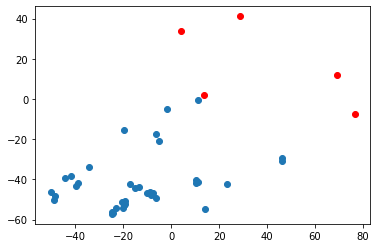

2019_12_09_14_32_17_


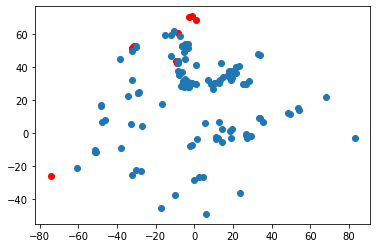

2019_12_11_11_41_04_


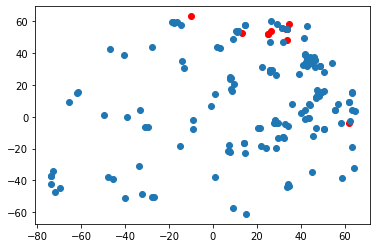

2019_12_20_15_15_21_


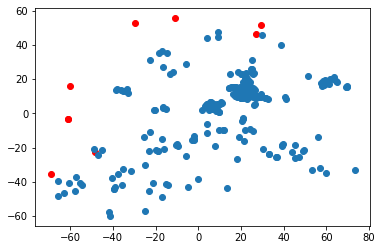

2019_12_23_17_52_55_


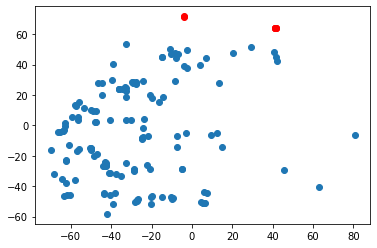

2020_01_02_14_26_54_


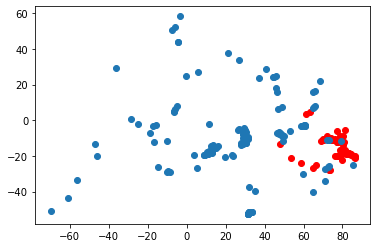

2020_01_06_11_52_11_


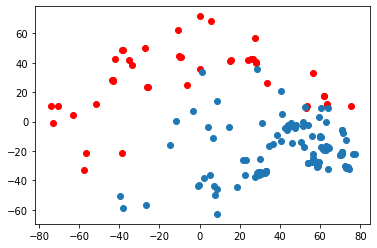

2020_01_08_14_04_45_


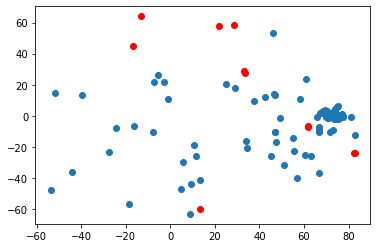

2020_01_29_18_12_15_


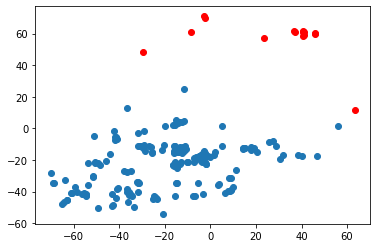

2020_02_04_20_48_03_


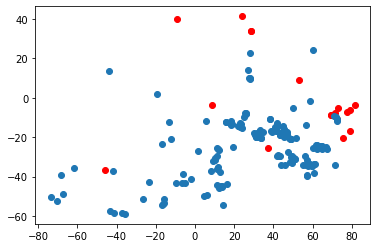

2020_02_12_14_09_21_


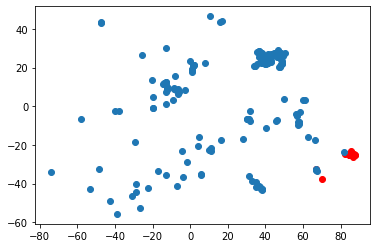

2020_02_13_18_05_51_


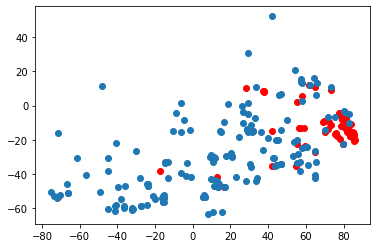

2020_02_19_13_03_01_


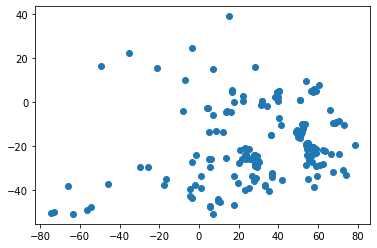

2020_03_10_10_15_04_


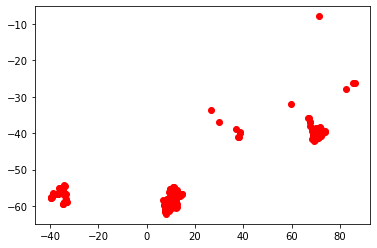

2020_03_11_17_14_41_


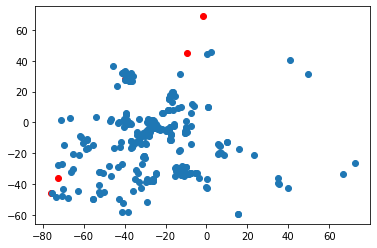

2020_03_18_16_40_53_


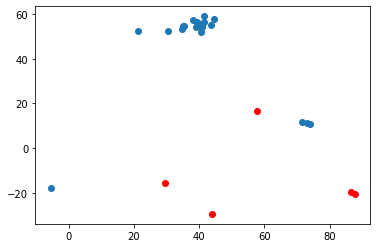

2020_03_20_15_36_12_


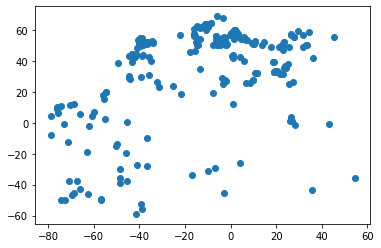

2020_03_20_15_36_36_


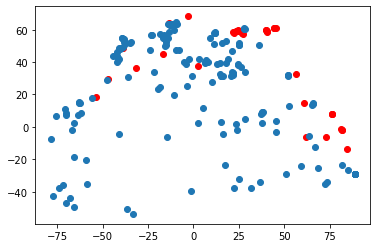

2020_03_27_11_31_09_


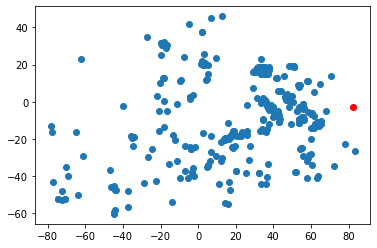

2020_03_27_16_56_41_


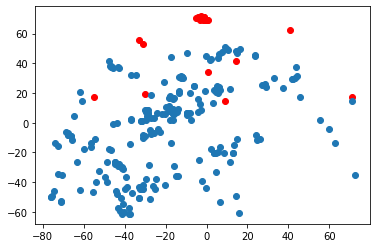

2020_04_01_14_23_24_


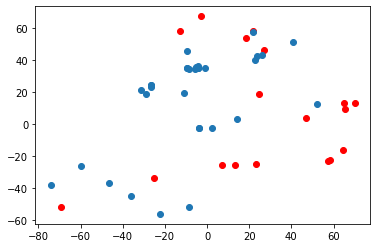

2020_04_08_14_36_59_


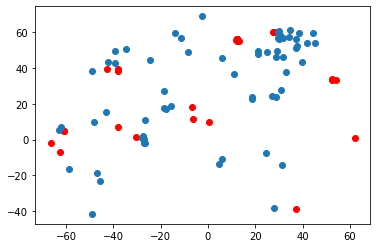

2020_04_08_18_05_56_


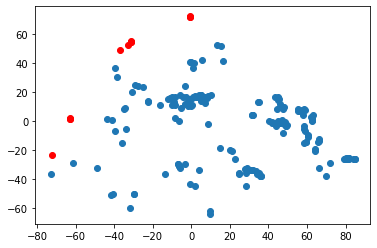

2020_05_07_12_52_25_


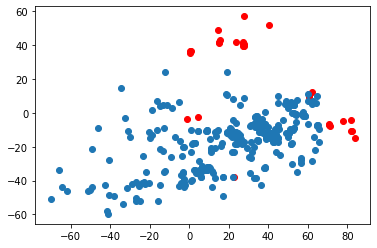

2020_05_13_19_30_26_


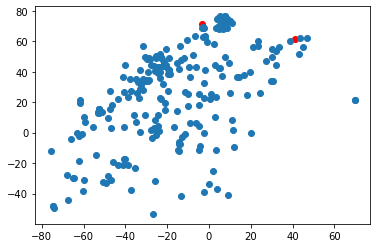

2020_05_15_12_43_58_


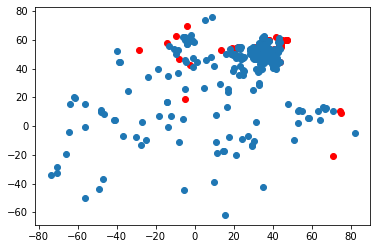

2020_05_20_12_06_41_


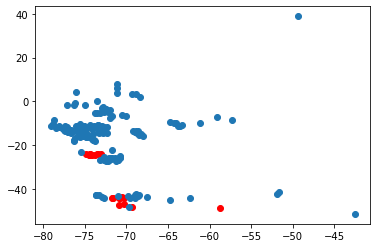

2020_05_26_14_42_41_


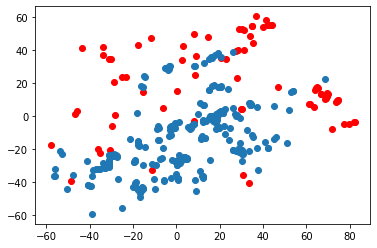

2020_05_27_15_02_29_


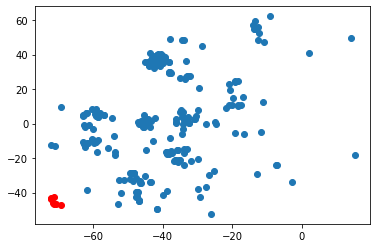

2020_05_28_15_20_27_


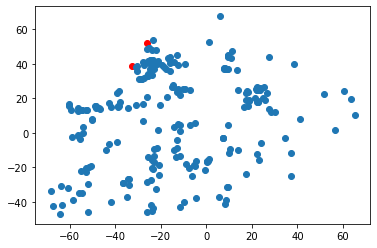

2020_06_03_13_33_43_


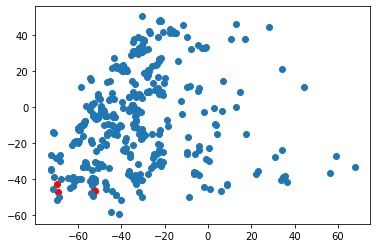

2020_06_10_16_35_27_


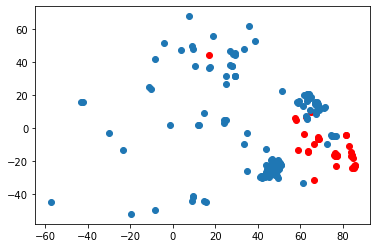

2020_06_17_14_29_15_


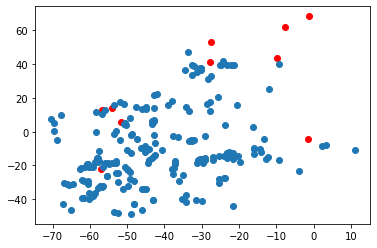

2020_06_23_15_23_26_


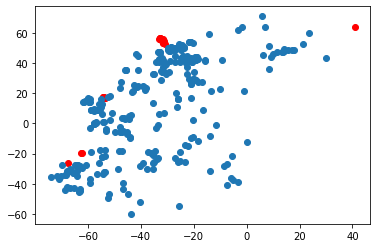

2020_06_23_19_23_37_


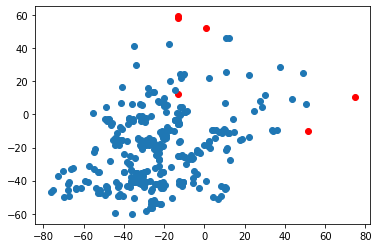

2020_06_24_18_00_12_


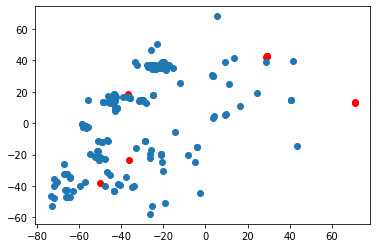

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
colors = mcolors.CSS4_COLORS

ill = y==1
healthy = y==0

plt.scatter(*data_tsne[healthy].T)
plt.scatter(*data_tsne[ill].T, c='red')
plt.show()

for p in np.unique(names):
    print(p)
    rows_i = (names==p) & (y==1)
    rows_h = (names==p) & (y==0)
    
    #plt.scatter(*data_tsne[rows_i].T, c=colors[list(colors)[np.random.choice(len(colors))]])
    plt.scatter(*data_tsne[rows_i].T, c='r')
    plt.scatter(*data_tsne[rows_h].T)
    plt.show()



In [ ]:
from glob import glob

paths = glob(os.path.join('/work/users/mi186veva/data_1d/raw_l2/*.npz'))
print(len(paths))

for p in paths:
    data = np.load(p)
    
    X = data['X']
    y = data['y']
    data_tsne = TSNE(n_components=2).fit_transform(X)
    
    rows_i = y==1
    rows_h = y==0
    
    #plt.scatter(*data_tsne[rows_i].T, c=colors[list(colors)[np.random.choice(len(colors))]])
    plt.scatter(*data_tsne[rows_i].T, c='r')
    plt.scatter(*data_tsne[rows_h].T)
    plt.show()


56
